In [23]:
import cv2
import common
import billboard_identifier
import billboard_replacement

from imageio import imwrite as imsave
import pathlib
# import ntpath
import numpy as np
import glob

In [37]:
import importlib
importlib.reload(billboard_replacement)
importlib.reload(common)
pass

In [25]:
data = billboard_identifier.read_data("../../resources/billboard_images.json")
source_images,\
label_images = billboard_identifier.get_billboards_from_data(
    data,
    score_pred=lambda x: x>10000
)

print(f"Loaded {len(source_images)} sources and {len(label_images)} labels")

Loaded 2329 sources and 2329 labels


In [26]:
decal_images = glob.glob("../../resources/decals/*.png")
decal_images = [cv2.imread(decal) for decal in decal_images]
print(f"Loaded {len(decal_images)} decals")

Loaded 128 decals


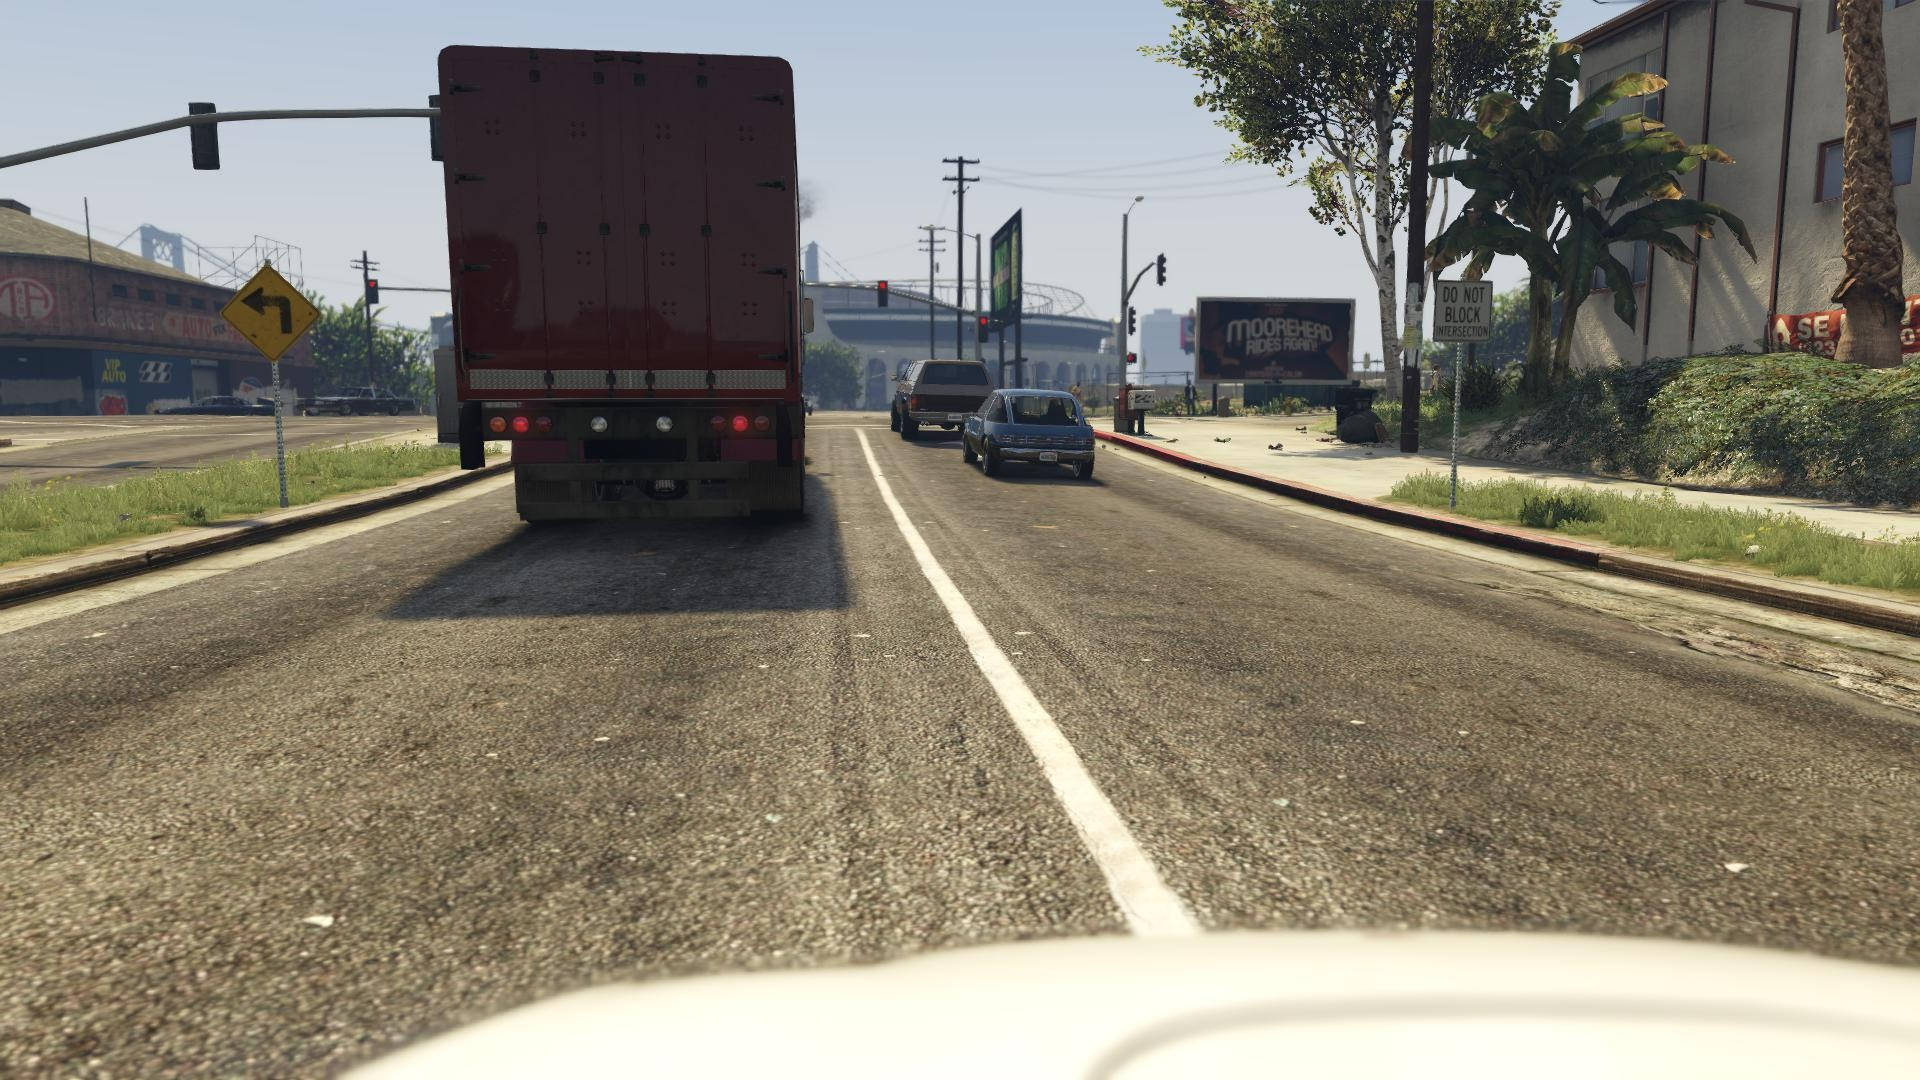

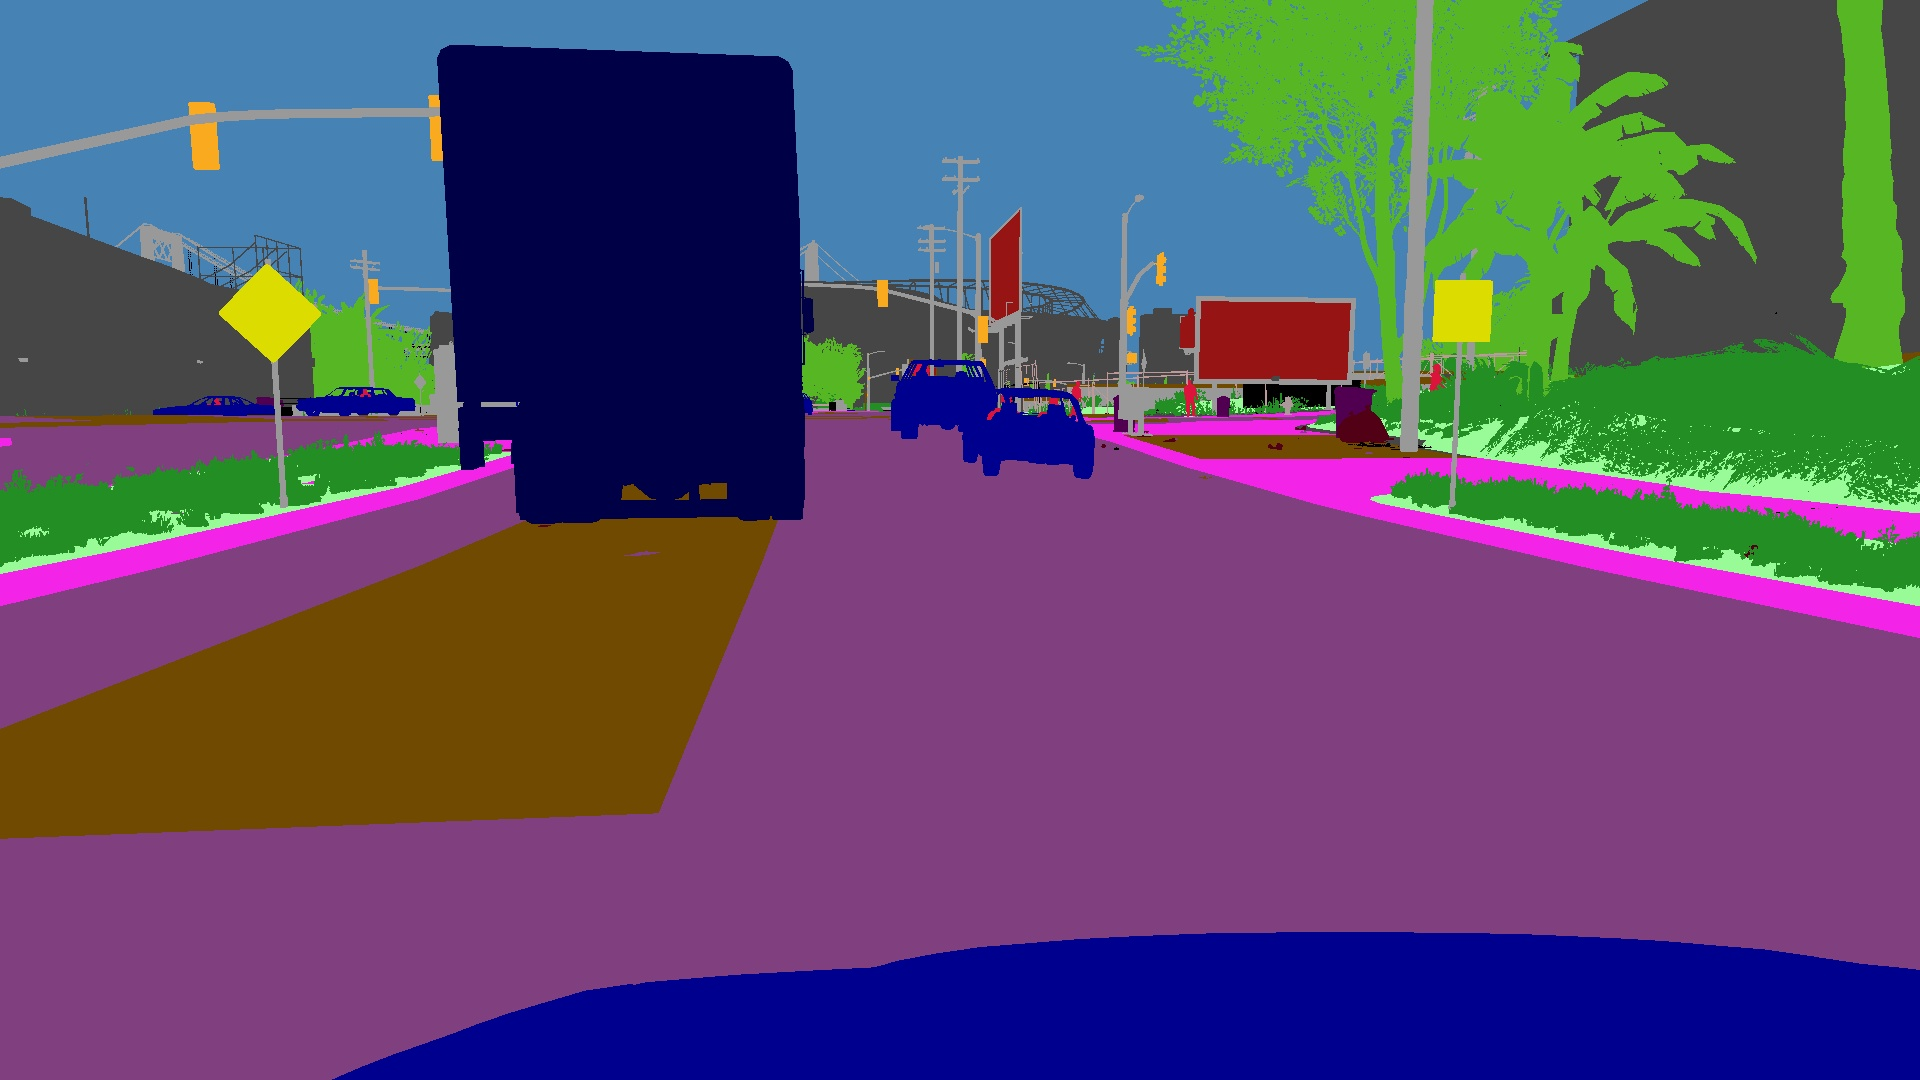

In [27]:
source_image = cv2.imread(source_images[0])
label_image = cv2.imread(label_images[0])
common.display_image(source_image)
common.display_image(label_image)

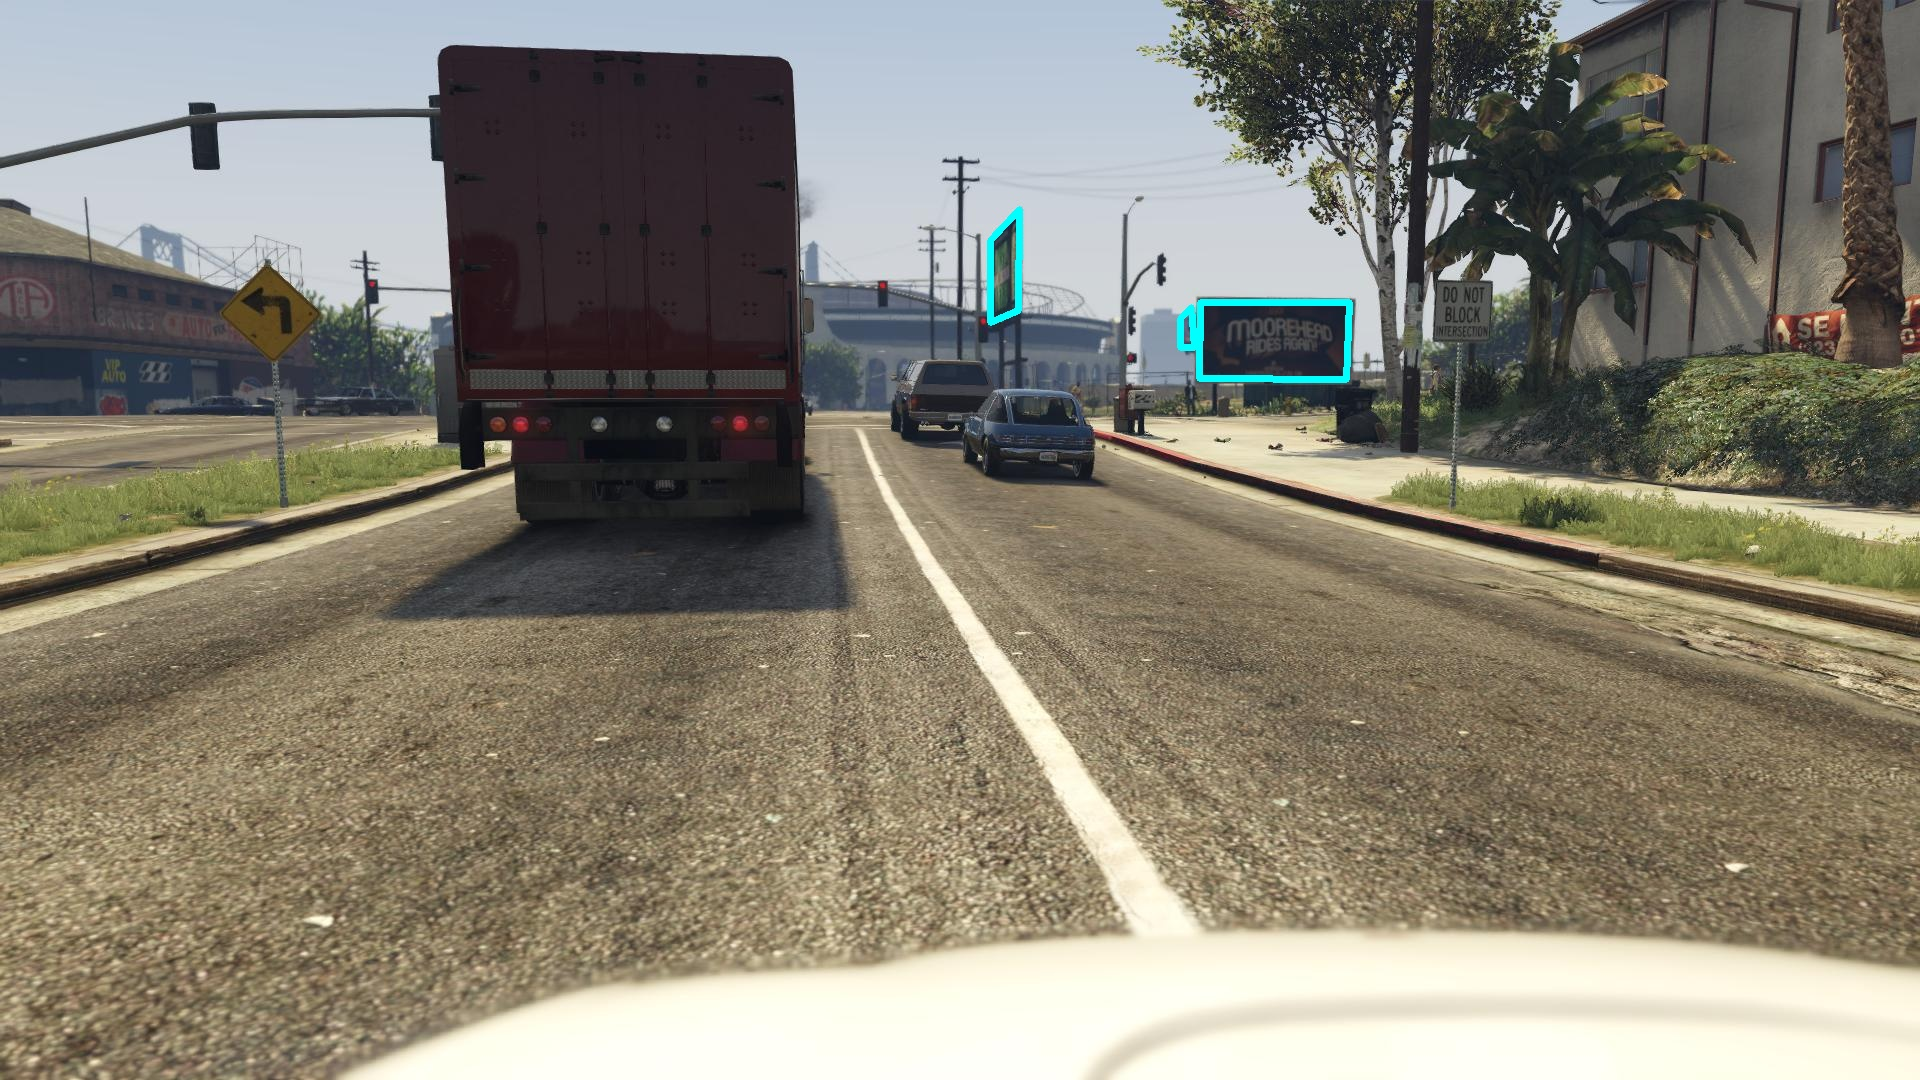

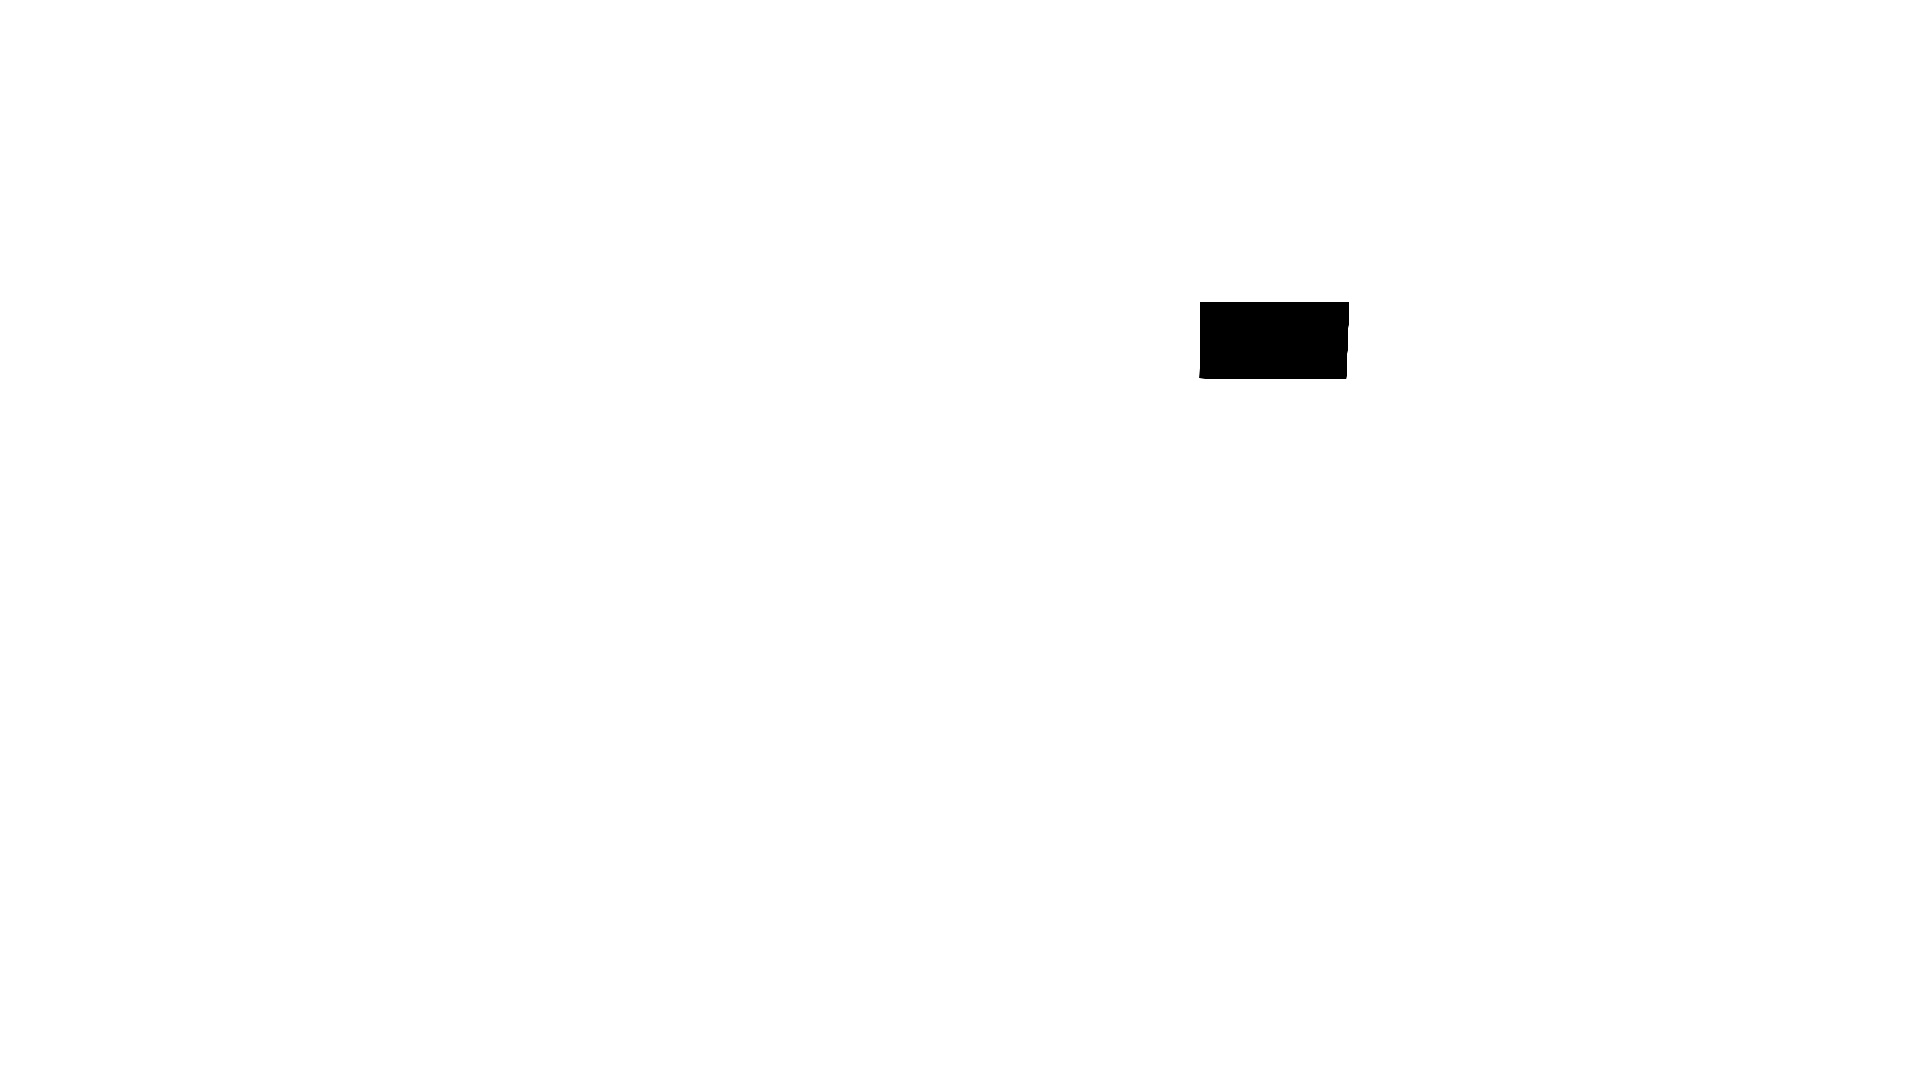

In [38]:
contours = billboard_replacement.get_billboard_contours(label_image)
common.display_image(billboard_replacement.show_contour_outlines(source_image, contours))
mask = billboard_replacement.get_contour_mask(source_image.shape, contours[0])
common.display_image(mask)

In [29]:
contour = contours[0]
print(contour.shape)
contour = billboard_replacement.get_corner_points(contour, mode=2)
print(np.shape(contour))

(4, 1, 2)
(4, 1, 2)


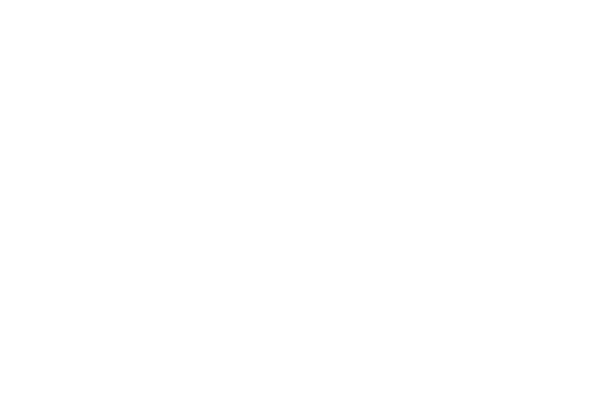

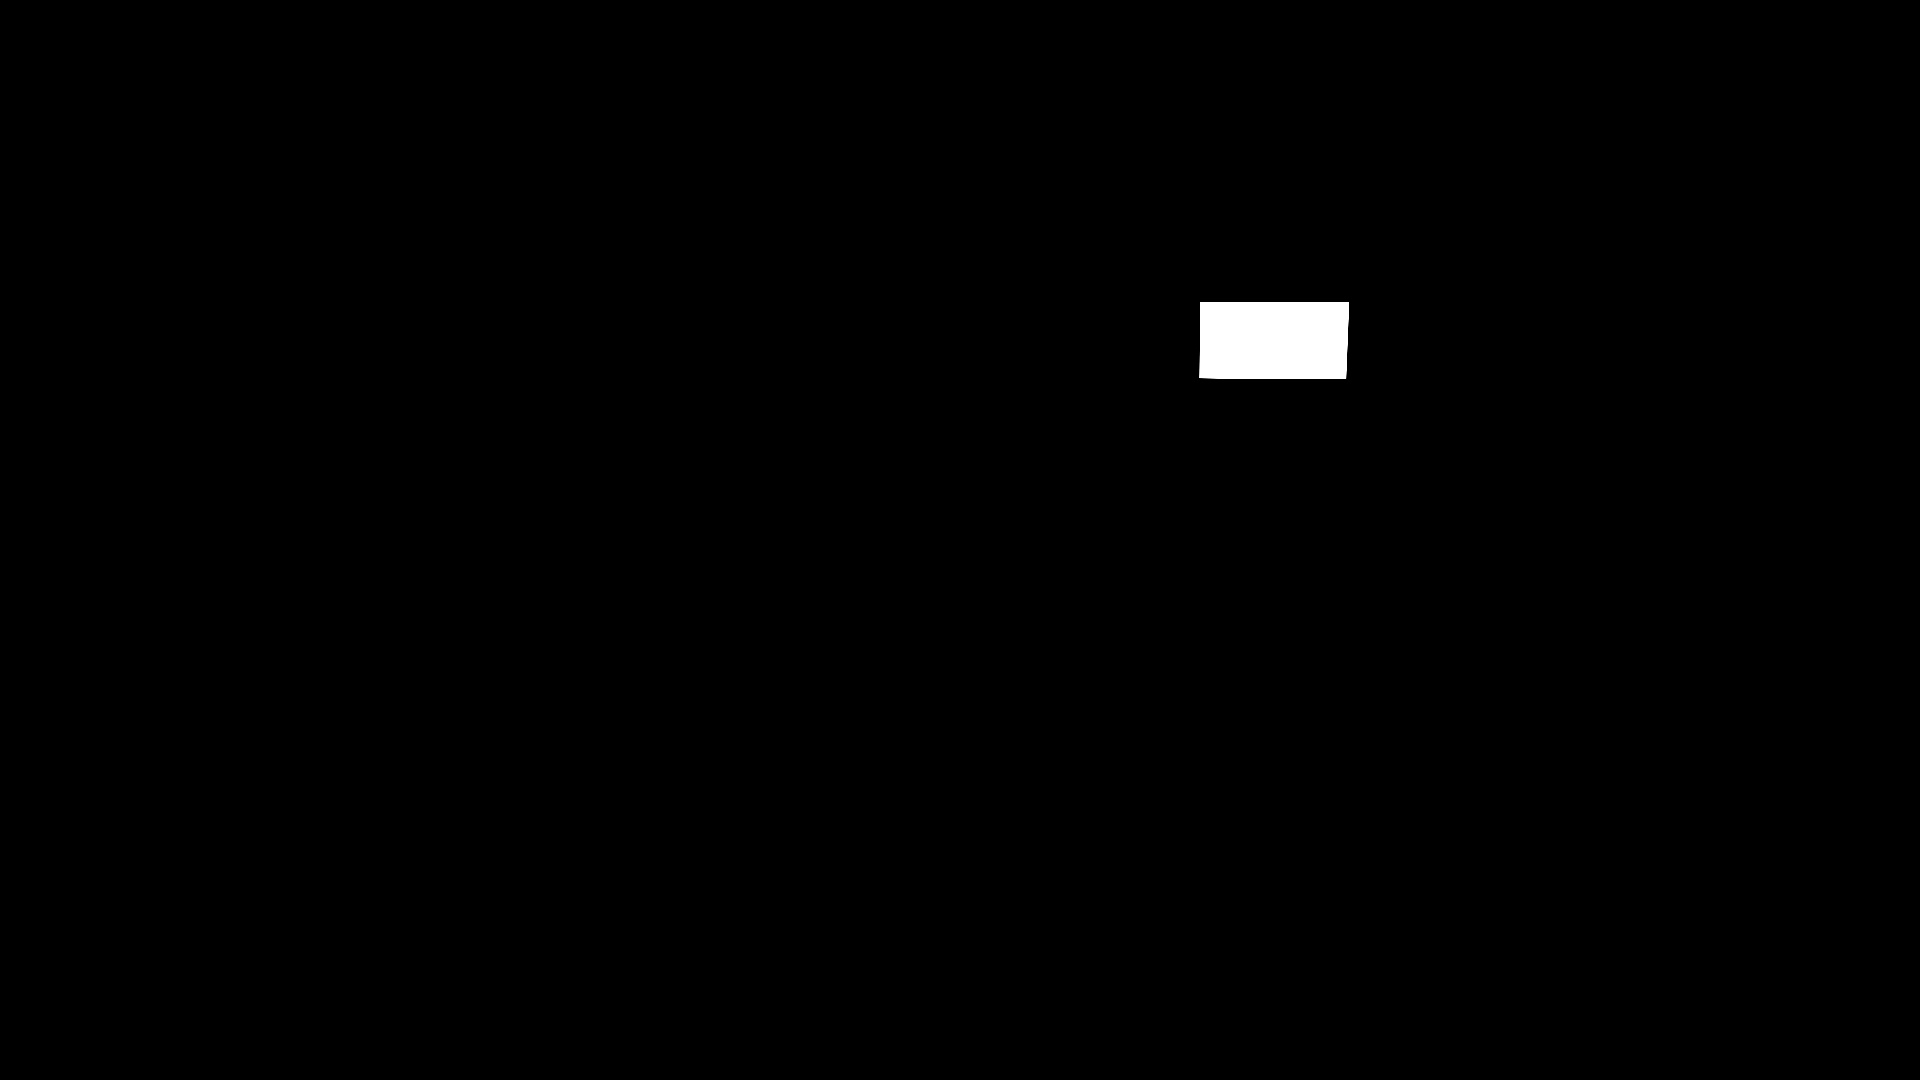

flip!


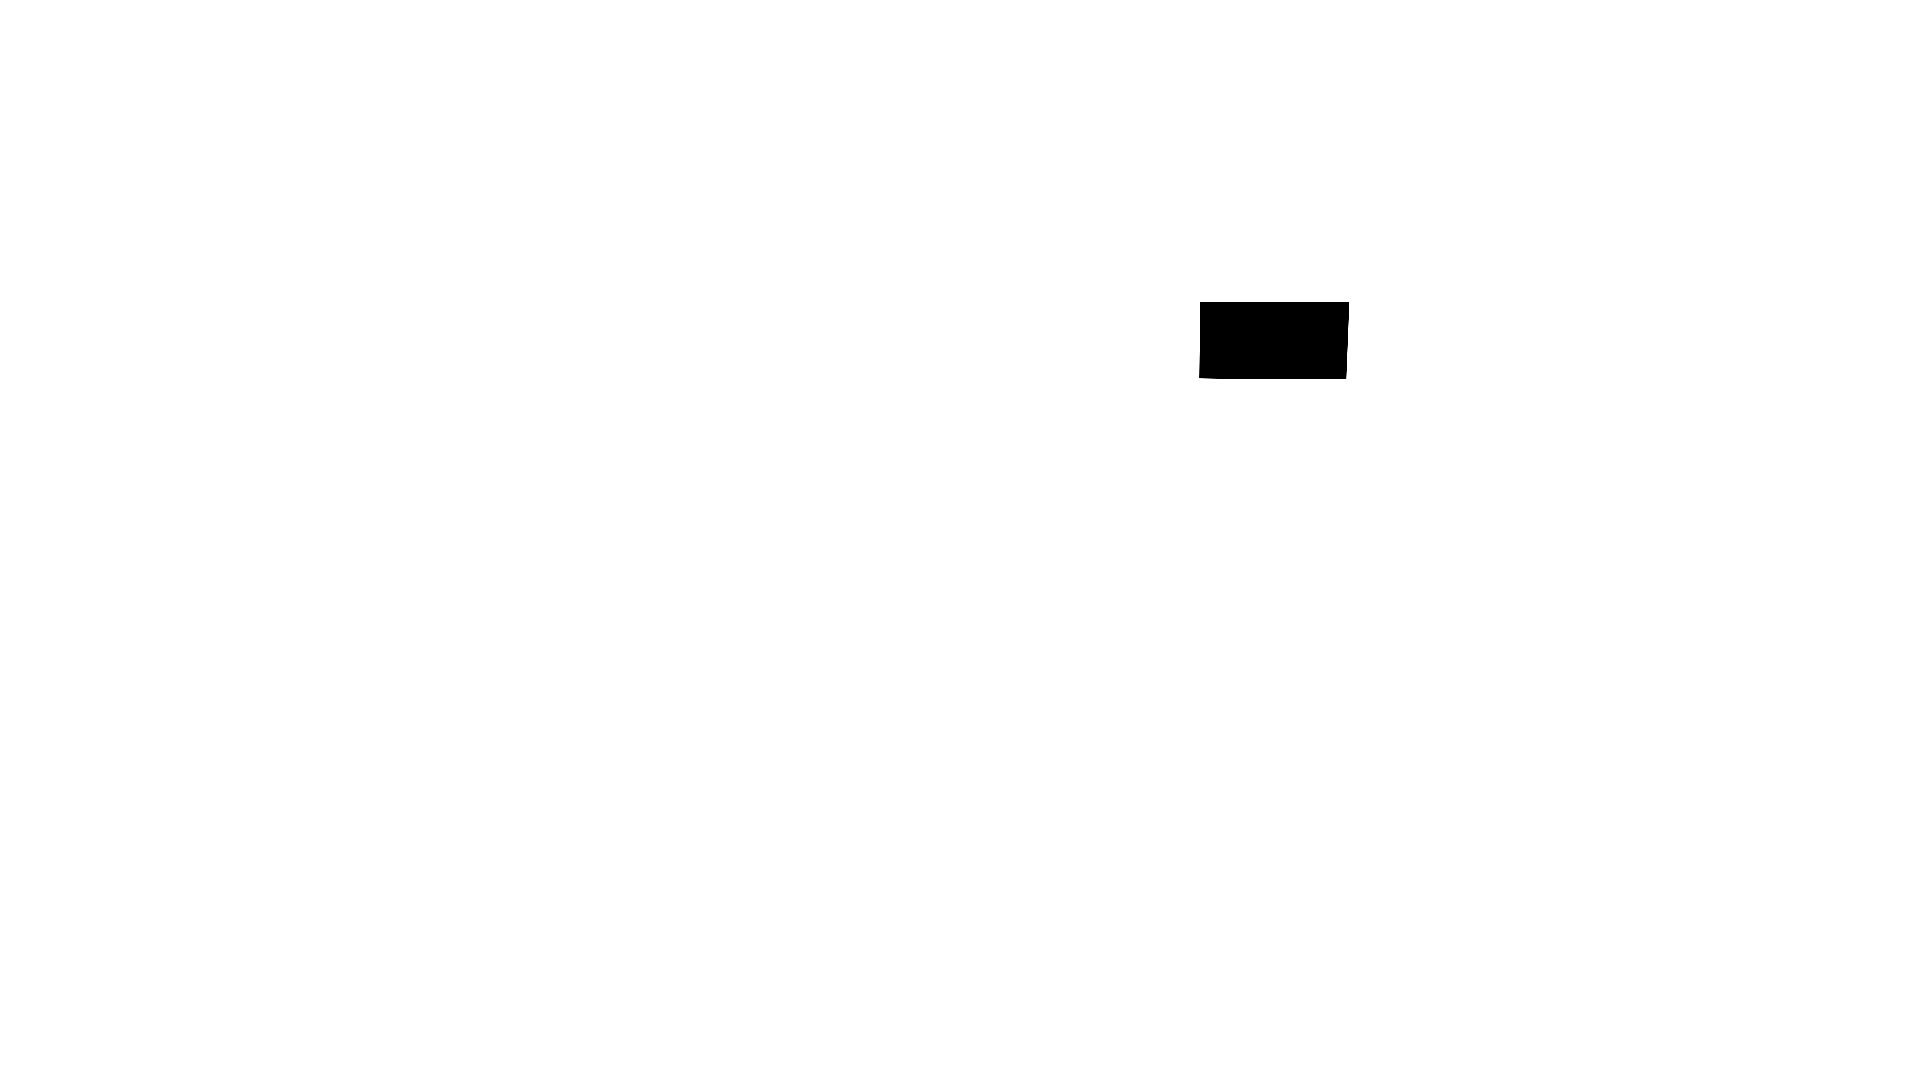

In [36]:
# decal = decal_images[0]
decal = 255 * np.ones(decal_images[0].shape, dtype=np.uint8)
common.display_image(decal)
decal = billboard_replacement.get_homo_warped_decal(
    source_image.shape,
    decal,
    contour
)
common.display_image(decal)
print("flip!")
decal = np.invert(decal)
common.display_image(decal)

In [31]:
output = billboard_replacement.apply_image_to_contour(
    source_image,
    decal,
    contour
)
common.display_image(output)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
imsave("../../out/a.png", output, format="png")

TypeError: Expected Ptr<cv::UMat> for argument 'src'